In [25]:
import torch
import torchvision
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

from model.model import SimpleCNN
from model.load_data import load_cifar10

In [26]:
# Load CIFAR-10 test data
batch_size = 100
_, testloader = load_cifar10(batch_size=batch_size)

# Instantiate the model and load trained weights
net = SimpleCNN()
net.load_state_dict(torch.load('saved_models/cifar_net.pth')) 
net.eval()

Data already downloaded to ../data/raw\cifar-10-batches-py
Files already downloaded and verified
Files already downloaded and verified


SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [27]:
# Initialize lists to store true and predicted labels
true_labels = []
pred_labels = []

# Evaluate the model on the test data
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.numpy())
        pred_labels.extend(predicted.numpy())

In [28]:
# Calculate accuracy
accuracy = np.mean(np.array(true_labels) == np.array(pred_labels))
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("Classification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=testloader.dataset.classes))

Accuracy: 0.7225
Classification Report:

              precision    recall  f1-score   support

    airplane       0.75      0.79      0.77      1000
  automobile       0.87      0.78      0.82      1000
        bird       0.71      0.54      0.61      1000
         cat       0.53      0.55      0.54      1000
        deer       0.68      0.66      0.67      1000
         dog       0.63      0.63      0.63      1000
        frog       0.75      0.80      0.77      1000
       horse       0.75      0.79      0.77      1000
        ship       0.82      0.84      0.83      1000
       truck       0.74      0.85      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



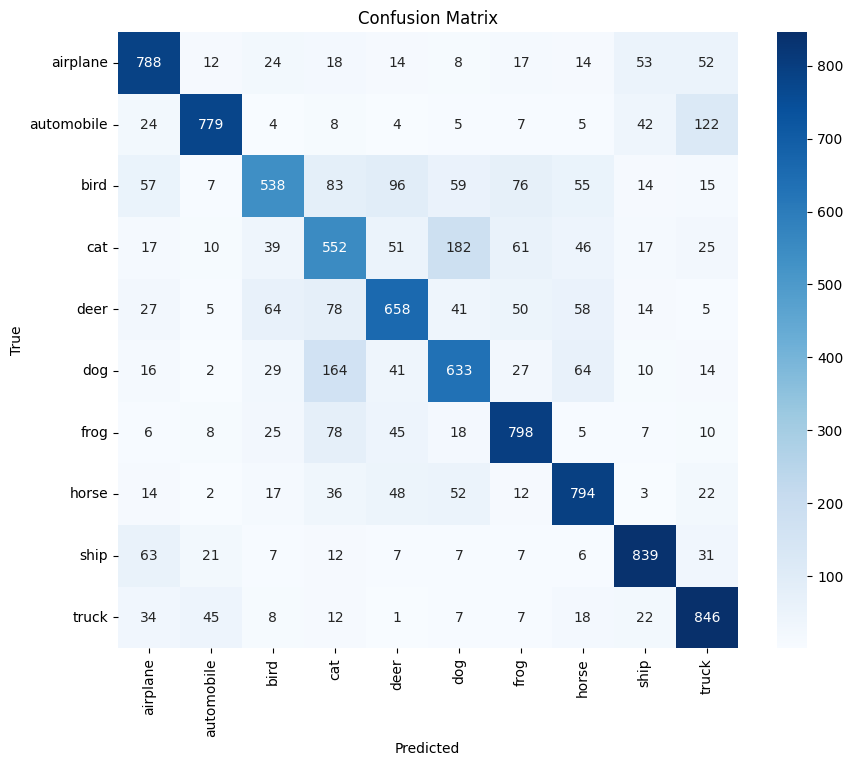

In [29]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=testloader.dataset.classes, yticklabels=testloader.dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Plot training/validation accuracy and loss over epochs

# Load and extract the metrics
metrics_path = 'saved_models/metrics.pth'
metrics = torch.load(metrics_path)

train_loss = metrics['train_loss']
train_acc = metrics['train_acc']
val_loss = metrics['val_loss']
val_acc = metrics['val_acc']

# Define the range of epochs
epochs = range(1, len(train_loss) + 1)

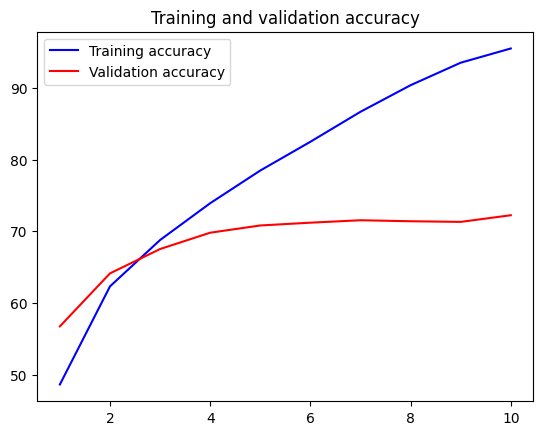

In [31]:
plt.figure()
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

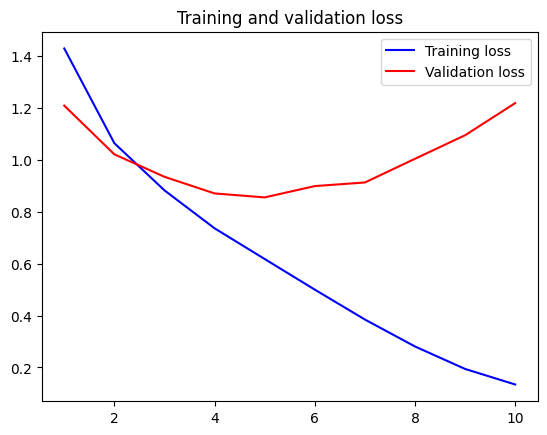

In [32]:
plt.figure()
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

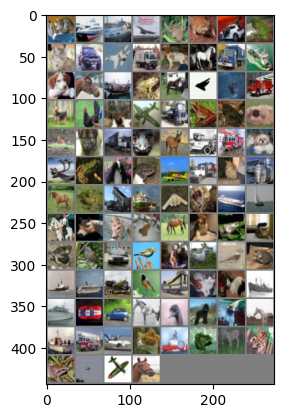

GroundTruth:  cat ship ship plane
Predicted:  dog ship plane plane


In [33]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Visualize some sample predictions
dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Display the images
imshow(torchvision.utils.make_grid(images))

# Print the ground truth labels
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]}' for j in range(4)))

# Print the predicted labels
print('Predicted: ', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))
